# Original text Analysis

In [1]:
import numpy as np
import pandas as pd

# Load Dataset
dataset = pd.read_csv("D:/cheng/Documents/GitHub/trump_taiwan_tweets_analysis/datasets/14_original_text_doc2vec_new.csv", sep='\t')
#dataset = dataset.dropna()

# Decomposition
X = dataset.iloc[:,6:].values

Elbow method:

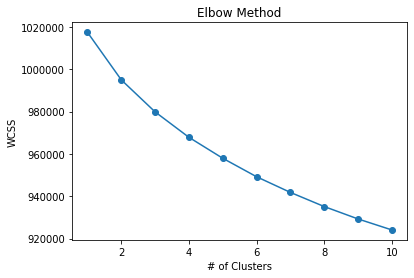

In [12]:
#K-Means Clustering
from sklearn.cluster import KMeans
import time

### Find Best K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=int(time.time()))
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
##
### Draw WCSS for each K
import matplotlib.pyplot as plt
##
plt.plot(range(1, 11), wcss,'o-')
plt.title("Elbow Method")
plt.xlabel("# of Clusters")
plt.ylabel("WCSS")
#plt.savefig("doc2vec_text8_elbow.png")
plt.show()

Average Silhouette method:

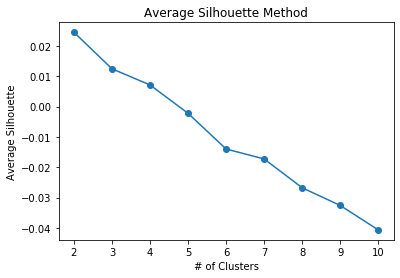

In [13]:
from sklearn.metrics import silhouette_score

silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=int(time.time()))
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 11), silhouette,'o-')
plt.title("Average Silhouette Method")
plt.xlabel("# of Clusters")
plt.ylabel("Average Silhouette")
plt.show()

In [4]:
#Prediction
from sklearn.cluster import KMeans
import time
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=int(time.time()))
Y_pred = kmeans.fit_predict(X)

In [5]:
dataset

,is_RT,retweet_from,whole_tweet_text,original_text,retweet_text,cleaned_original_text,feature_0,feature_1,feature_2,feature_3,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,NaN,"""@MysticWolf12001: @realDonaldTrump C'mon, you...","""@MysticWolf12001: @realDonaldTrump C'mon, you...",NaN,mysticwolf12001 cmon you know youre the only o...,-0.768592,-0.792329,0.585194,1.035691,...,0.314116,-0.414782,0.424944,-1.626707,-0.525767,1.040392,-0.418054,-0.899761,0.344677,1.182745
1,0,NaN,"""@Chad_Williams91: @realDonaldTrump if you're ...","""@Chad_Williams91: @realDonaldTrump if you're ...",NaN,chadwilliams91 if youre president ill move to ...,0.921706,-1.044010,0.845550,-0.481496,...,1.065640,0.169806,1.559093,2.022515,-0.505934,0.026736,0.732342,1.288271,-0.895938,-0.214861
2,0,NaN,"""@HunterBalthazor: @realDonaldTrump if you ran...","""@HunterBalthazor: @realDonaldTrump if you ran...",NaN,hunterbalthazor if you ran for president you h...,0.593363,-0.937204,0.891155,1.787635,...,0.130576,0.632830,0.901615,-0.486742,-0.846205,0.267818,1.795387,-0.094963,0.367216,1.055712
3,0,NaN,"""@kyleraccio: @realDonaldTrump @Vinny_Titone I...","""@kyleraccio: @realDonaldTrump @Vinny_Titone I...",NaN,kyleraccio vinnytitone i think hell lead the p...,-1.371773,-1.320379,0.048346,0.998821,...,-0.744296,-0.869827,0.967274,1.104119,-0.399383,-0.907037,0.254770,0.466751,0.778327,-0.327616
4,0,NaN,@HarryCraig96 @TrumpTowerNY Thanks!,@HarryCraig96 @TrumpTowerNY Thanks!,NaN,harrycraig96 thanks,0.238004,-0.328827,0.389766,0.018991,...,-0.054484,-0.065257,0.216145,0.133834,-0.328141,0.097133,0.276053,0.041791,0.260765,0.255579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30562,0,NaN,"""@MyView001: @realDonaldTrump U sure could do ...","""@MyView001: @realDonaldTrump U sure could do ...",NaN,myview001 u sure could do a lot for the country,-1.217602,-0.281371,0.636625,-0.793442,...,0.218246,0.514886,-1.397036,0.756255,-0.721715,0.109418,0.901381,0.135878,0.352188,1.005622
30563,0,NaN,"""@ColemanG81: I can't wait for DonaldTrump to ...","""@ColemanG81: I can't wait for DonaldTrump to ...",NaN,colemang81 i cant wait for donaldtrump to beco...,0.618593,-1.392723,0.825320,2.185406,...,0.140867,-0.740998,-0.715453,2.061997,0.171142,1.972720,0.303354,0.637566,0.312897,-1.227213
30564,0,NaN,Leaving now - I'm spending the entire day in I...,Leaving now - I'm spending the entire day in I...,NaN,leaving now im spending the entire day in iowa...,0.682222,1.118954,0.435617,1.092026,...,0.272459,-0.316456,0.362570,1.247555,-0.793134,-1.049026,-0.804910,-0.100516,0.230188,0.529790
30565,0,NaN,Meeting with Iowa State Senate Leaders https:/...,Meeting with Iowa State Senate Leaders https:/...,NaN,meeting with iowa state senate leaders,-0.324657,-0.242660,1.166399,1.209210,...,0.520577,0.649616,0.241583,1.152330,-0.121096,-0.704970,-0.072429,0.240600,-0.172980,-0.626538


In [6]:
dataset['pred'] = Y_pred
#dataset.to_csv("original_prediction.csv", sep='\t', index=None)

In [7]:
dataset

,is_RT,retweet_from,whole_tweet_text,original_text,retweet_text,cleaned_original_text,feature_0,feature_1,feature_2,feature_3,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,pred
0,0,NaN,"""@MysticWolf12001: @realDonaldTrump C'mon, you...","""@MysticWolf12001: @realDonaldTrump C'mon, you...",NaN,mysticwolf12001 cmon you know youre the only o...,-0.768592,-0.792329,0.585194,1.035691,...,-0.414782,0.424944,-1.626707,-0.525767,1.040392,-0.418054,-0.899761,0.344677,1.182745,0
1,0,NaN,"""@Chad_Williams91: @realDonaldTrump if you're ...","""@Chad_Williams91: @realDonaldTrump if you're ...",NaN,chadwilliams91 if youre president ill move to ...,0.921706,-1.044010,0.845550,-0.481496,...,0.169806,1.559093,2.022515,-0.505934,0.026736,0.732342,1.288271,-0.895938,-0.214861,1
2,0,NaN,"""@HunterBalthazor: @realDonaldTrump if you ran...","""@HunterBalthazor: @realDonaldTrump if you ran...",NaN,hunterbalthazor if you ran for president you h...,0.593363,-0.937204,0.891155,1.787635,...,0.632830,0.901615,-0.486742,-0.846205,0.267818,1.795387,-0.094963,0.367216,1.055712,1
3,0,NaN,"""@kyleraccio: @realDonaldTrump @Vinny_Titone I...","""@kyleraccio: @realDonaldTrump @Vinny_Titone I...",NaN,kyleraccio vinnytitone i think hell lead the p...,-1.371773,-1.320379,0.048346,0.998821,...,-0.869827,0.967274,1.104119,-0.399383,-0.907037,0.254770,0.466751,0.778327,-0.327616,0
4,0,NaN,@HarryCraig96 @TrumpTowerNY Thanks!,@HarryCraig96 @TrumpTowerNY Thanks!,NaN,harrycraig96 thanks,0.238004,-0.328827,0.389766,0.018991,...,-0.065257,0.216145,0.133834,-0.328141,0.097133,0.276053,0.041791,0.260765,0.255579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30562,0,NaN,"""@MyView001: @realDonaldTrump U sure could do ...","""@MyView001: @realDonaldTrump U sure could do ...",NaN,myview001 u sure could do a lot for the country,-1.217602,-0.281371,0.636625,-0.793442,...,0.514886,-1.397036,0.756255,-0.721715,0.109418,0.901381,0.135878,0.352188,1.005622,1
30563,0,NaN,"""@ColemanG81: I can't wait for DonaldTrump to ...","""@ColemanG81: I can't wait for DonaldTrump to ...",NaN,colemang81 i cant wait for donaldtrump to beco...,0.618593,-1.392723,0.825320,2.185406,...,-0.740998,-0.715453,2.061997,0.171142,1.972720,0.303354,0.637566,0.312897,-1.227213,0
30564,0,NaN,Leaving now - I'm spending the entire day in I...,Leaving now - I'm spending the entire day in I...,NaN,leaving now im spending the entire day in iowa...,0.682222,1.118954,0.435617,1.092026,...,-0.316456,0.362570,1.247555,-0.793134,-1.049026,-0.804910,-0.100516,0.230188,0.529790,1
30565,0,NaN,Meeting with Iowa State Senate Leaders https:/...,Meeting with Iowa State Senate Leaders https:/...,NaN,meeting with iowa state senate leaders,-0.324657,-0.242660,1.166399,1.209210,...,0.649616,0.241583,1.152330,-0.121096,-0.704970,-0.072429,0.240600,-0.172980,-0.626538,0


Visualization:

In [8]:
def PCA(X,isCorrMX):
    n = np.mat(X).shape[0]
    X = np.array(X)
    z = X-np.mean(X,axis=0)
    if(isCorrMX):
        covariance = np.corrcoef(X.T)    #use correlation matrix
    else:
        covariance = z.T.dot(z)/(n-1)    #use covariance matrix
    
    eigVals, eigVecs = np.linalg.eig(covariance)   #find eigenvalues and eigenvectors
    score = X.dot(eigVecs)   #score matrix
    
    plt.rcParams['font.sans-serif']=['Microsoft YaHei']
    variance = eigVals
    component = [i+1 for i in range(len(X[0]))]

    cumulative = []
    add = 0
    for i in range(len(eigVals)):
        add = add + eigVals[i]
        cumulative.append(add)
    cumulative_proportion = cumulative/sum(eigVals)

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.bar(component,variance)
#     ax1.set_xlim(0, 40)
#     ax1.set_ylim(0, 800000)
    ax1.set_ylabel('Variance',fontsize=13)

    ax2 = ax1.twinx()
    ax2.plot(component, cumulative_proportion*100,'k',marker='o')
    ax2.set_ylabel('Cumulative Percentage（%）',fontsize=13)
    ax2.set_ylim(0, 100)
    
    return eigVecs,eigVals,score,fig

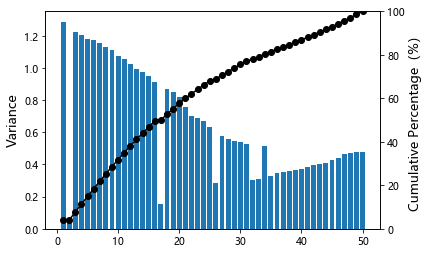

In [11]:
import matplotlib.pyplot as plt
eigVecs,eigVals,score,fig = PCA(X,False)

In [12]:
df = pd.DataFrame(score[:,0:2], columns=['PC1','PC2'])
df['pred'] = Y_pred
df

,PC1,PC2,pred
0,0.162182,0.533801,0
1,-1.601043,0.247581,1
2,-1.775954,0.110041,1
3,0.766570,0.028278,0
4,-0.429682,0.071908,1
...,...,...,...
30562,-0.409029,0.052060,1
30563,2.313991,-0.128383,0
30564,-0.233139,-0.092700,1
30565,1.049192,0.151413,0


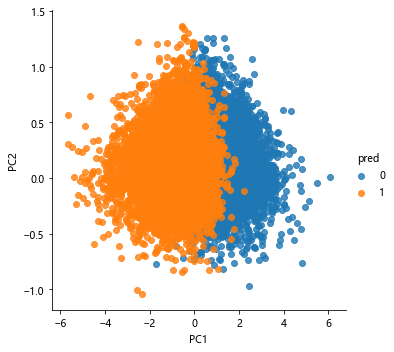

In [13]:
import seaborn as sns
facet = sns.lmplot(data=df, x='PC1', y='PC2', hue='pred', 
                   fit_reg=False, legend=True, legend_out=True)

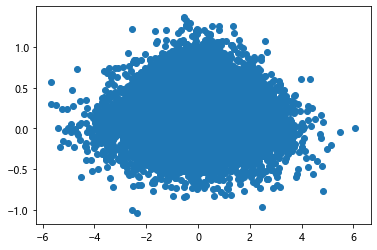

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df["PC1"], df["PC2"], marker='o')
plt.show()

## Semi-supervised 

In [15]:
dataset2 = pd.read_csv("original_prediction.csv")
dataset2['pred_truth'] = dataset2['pred_truth'].fillna(-1)  #unlabed data filled with -1
df = pd.concat([dataset2['whole_tweet_text'],dataset2['pred_truth']],axis=1)

In [16]:
merge = pd.merge(dataset,df, on='whole_tweet_text')
merge = merge.sort_values(by=['pred_truth'],ascending=False)
train = merge[:171]   #labeled data

In [46]:
X = merge.iloc[:10000,6:56].values
y = merge['pred_truth'][:10000]

In [56]:
from sklearn.semi_supervised import LabelSpreading
unlabeled_set = np.array(merge.index[171:10000])
lp_model = LabelSpreading(gamma=.25, max_iter=20)
lp_model.fit(X, y)
#predicted_labels = lp_model.transduction_[unlabeled_set]
pred_labels = lp_model.predict(X)[171:]

In [58]:
y_label = y[:171]
y_pred = np.concatenate((y_label,pred_labels))

In [96]:
df = merge[:10000]
df['pred_semi'] = y_pred
df.to_csv("original_prediction_semi.csv", sep='\t', index=None)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
